In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import scipy.stats as stats
# 1. Load data
df = pd.read_csv('Automobile_data.csv')

df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [125]:
# 2. Clean data
df=df.replace('?',np.NaN)
df.isnull().sum()

#normalized-losses #- 41
#num-of-doors - 2
#bore - 4
#stroke - 4
#horsepower - 2
#peak-rpm - 2
#price - 4

#every NaN but price and door-number might be replaced by average and
#door-number may be set to the most popular
#and rows without price may be deleted because we have to find attributes valuable for price

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [126]:
df["normalized-losses"].replace(np.nan, df["normalized-losses"].astype("float").mean(axis=0), inplace=True)
df["num-of-doors"].replace(np.nan, df['num-of-doors'].value_counts().idxmax(), inplace=True)
df["bore"].replace(np.nan, df["bore"].astype("float").mean(axis=0), inplace=True)
df["stroke"].replace(np.nan, df["stroke"].astype("float").mean(axis=0), inplace = True)
df["horsepower"].replace(np.nan, df["horsepower"].astype("float").mean(axis=0), inplace = True)
df["peak-rpm"].replace(np.nan, df["peak-rpm"].astype("float").mean(axis=0), inplace = True)
df.dropna(subset=["price"], axis=0, inplace=True)

df.reset_index(drop=True, inplace=True)

df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [127]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [128]:
df.dtypes
#some attributes in dataframe have wrong type and cannot be processed in corelation.
#they are:
#bore, stroke - float
#normalized-losses, horsepower, peak-rpm, price - int

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [129]:
df[["normalized-losses", "horsepower", "peak-rpm", "price"]] = df[["normalized-losses", "horsepower", "peak-rpm", "price"]].astype("int")
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")

df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [130]:
df.corr(numeric_only='True')['price'][:-1].sort_values(ascending=False)
#here we may see linear correlation of every numeric attribute. most important for us here is price attribute
#the closer correlation value to 1 or -1 - the better it tells about attribute influence on price

engine-size          0.872335
curb-weight          0.834415
horsepower           0.809607
width                0.751265
length               0.690628
wheel-base           0.584642
bore                 0.543155
height               0.135486
normalized-losses    0.133999
stroke               0.082269
compression-ratio    0.071107
symboling           -0.082391
peak-rpm            -0.101612
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64

<AxesSubplot: xlabel='engine-size', ylabel='price'>

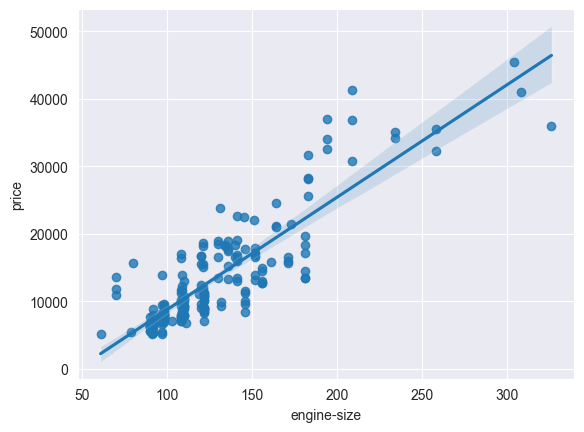

In [131]:
#to be sure that correlation function works correctly let's build a plot
sns.regplot(x = 'engine-size', y = 'price', data = df)

wheel-base 8.076488270732243e-20
length 8.016477466158188e-30
width 9.200335510479686e-38
curb-weight 2.189577238893318e-53
engine-size 9.265491622197335e-64
bore 8.049189483935261e-17
horsepower 6.273536270650683e-48
city-mpg 2.3211320655672453e-29
highway-mpg 1.7495471144474617e-31
price 0.0


<AxesSubplot: ylabel='attribute'>

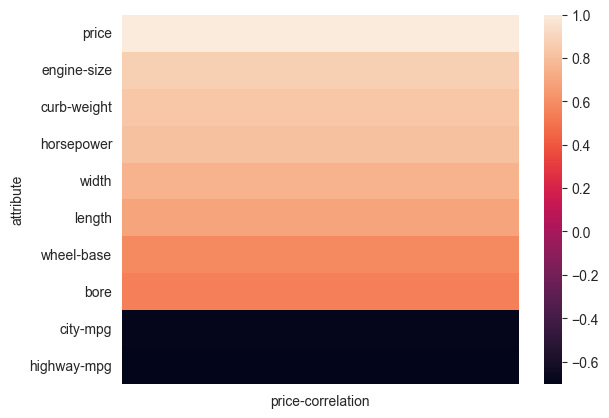

In [132]:
#let's create a result dataFrame with valuable price factors
#result = pd.DataFrame(columns=["wheel-base", "length", "width", "curb-weight", "engine-size", ""])

#to be sure that correlation is statistically significant we have to check it's p-value which is responsible for statistical significance of correlation
res_df = pd.DataFrame(columns=["attribute", "price-correlation"])
for col in df:
    if df[col].dtypes == np.int64 or df[col].dtypes == float:
        corr, p_value = stats.pearsonr(df[col], df['price'])
        if p_value < 0.0001:
            new_row = pd.DataFrame({"attribute":col,"price-correlation":corr}, index=[0])
            res_df = pd.concat([new_row, res_df.loc[:]]).reset_index(drop=True)
            print(col + " " + str(p_value))
from scipy import stats
res_df.set_index("attribute", inplace=True)
#res_df.sort_values(by="price-correlation").head(15)
sns.heatmap(res_df.sort_values(by="price-correlation", ascending=False))

<AxesSubplot: xlabel='drive-wheels', ylabel='price'>

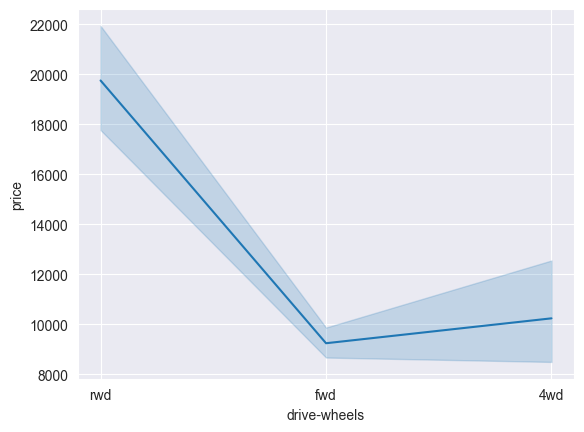

In [133]:
#categorical variables
#fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,num-of-cylinders,fuel-system
sns.lineplot(x="drive-wheels", y="price", data=df)
#most valuable are:body-style,drive-wheels,engine-location,num-of-cylinders

In [138]:
df_group = df[['body-style','drive-wheels','engine-location','num-of-cylinders','price']]
grouped = df_group.groupby(['body-style','drive-wheels','engine-location','num-of-cylinders'],as_index=False).mean()
grouped.sort_values(by='price', ascending=False)
grouped.set_index("body-style", inplace=True)
#as we see most valuable cars are hardtops, sedans, convertibles with rwd drive-wheels, and the bigger is number of cylinders the more expensive the car is
grouped.sort_values(by='price', ascending=False).head(15)

,drive-wheels,engine-location,num-of-cylinders,price
body-style,,,,
hardtop,rwd,front,eight,45400.000000
sedan,rwd,front,eight,37572.000000
convertible,rwd,rear,six,37028.000000
sedan,rwd,front,twelve,36000.000000
convertible,rwd,front,eight,35056.000000
hardtop,rwd,rear,six,33278.000000
sedan,rwd,front,five,28576.000000
wagon,rwd,front,five,28248.000000
hardtop,rwd,front,five,28176.000000
